<a href="https://colab.research.google.com/github/YLiu95/ml/blob/main/ECS7020P_miniproject_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECS7020P mini-project submission

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars).
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd Hums and Whistles dataset and build a solution model. (ii) Create a product that uses the functionality provided by a model trained on the MLEnd Hums and Whistles dataset (e.g. a simple App that predicts the label Harry or StarWars when you hum to it).  

The submission will consist of two Jupyter notebooks, one for the basic solution and another one for advanced solution. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zipped and submitted toghether**.

Each uploaded notebook should consist of:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks will not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Yishan Liu
**Student ID**:  200267117



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

Machine learning problem:
- Create a ML pipeline to predict song labels of Potter, StarWars, Panther, Rain, Hakuna, Mamma, Showman, and Frozen using audio segments from the MLEnd Hums and Whistles dataset.


What's interesting:
- We will use all data from MLEnd Hums and Whistles dataset.
- Our pipeline will predict eight labels.
- We will create neural network architectures.
- We will use the Mel Frequency Cepstral Coefficients (MFCCs) feature extraction technique.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. Note that your pipeline does not need to include all the stages.

ML pipeline description:
- Extract 40 MFCCs features from all audio segments
- Create training and validation data with the features and labels
- Train the neural network architecture with the training data, and calculate the training accuracy
- Validate the neural network architecture with the validation data, and calculate the validation accuracy
    - Examine other performance matrices to ensure the quality of the neural network architecture

Input:
- MFCCs features extracted from all audio segments and their labels.

Output:
- Prediction of the audio segments' labels.


# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output.

We will use the Mel Frequency Cepstral Coefficients (MFCCs) feature extraction technique to extract 40 features from the audio segments.

Input:
- All audio segments in the MLEnd Hums and Whistles dataset.

Output:
- MFCCs features.

# 5 Modelling

Describe the ML models that you will implement.

- We will implement a sequential model.
- Model 1 and model 2 have four layers.
    - The first layer is a dense layer with 256 perceptrons and rectified linear activation function (ReLU).
    - The second layer is the same as the first layer except that it has 512 perceptrons.
    - The third layer is the same as the first layer.
    - The final layer is the output layer with 2 perceptrons and softmax activation function.
- Model 3 is the same with model 1 and model 2 except the activation functions in the hidden layers are Hyperbolic Tangent (Tanh) activation functions.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

We will create a training, and validation dataset using the features extracted and the labels.
- 20% of the features data and labels will be the validation data.
- The other 80% data will be used for training.

We will train the model with the training data and validate the model with the validation data using:
- Categorical cross-entropy loss function.
- Adam optimisation and stochastic gradient descent optimisation.
- The quality matrix is accuracy.

We will use sensitivity, precision, and confusion matrix to double check the performance of the model.

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

- We will use all data in the MLEnd Hums and Whistles dataset.
- We will create training and validation data from the features extracted from the raw audio segments.
    - We will use the training and validation data to train and validate the model.

Import libriaries and mount Google Drive.

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


## Check our files
Check the number of audio segments in each folder.

In [ ]:
potter_path = '/content/drive/MyDrive/Data/MLEndHW/potter/*.wav'
potter_files = glob.glob(potter_path)
len(potter_files)

411

In [ ]:
starwar_path = '/content/drive/MyDrive/Data/MLEndHW/starwar/*.wav'
starwar_files = glob.glob(starwar_path)
len(starwar_files)

413

In [ ]:
panther_path = '/content/drive/MyDrive/Data/MLEndHW/panther/*.wav'
panther_files = glob.glob(panther_path)
len(panther_files)

413

In [ ]:
rain_path = '/content/drive/MyDrive/Data/MLEndHW/rain/*.wav'
rain_files = glob.glob(rain_path)
len(rain_files)

413

In [ ]:
hakuna_path = '/content/drive/MyDrive/Data/MLEndHW/hakuna/*.wav'
hakuna_files = glob.glob(hakuna_path)
len(hakuna_files)

412

In [ ]:
mamma_path = '/content/drive/MyDrive/Data/MLEndHW/mamma/*.wav'
mamma_files = glob.glob(mamma_path)
len(mamma_files)

412

In [ ]:
showman_path = '/content/drive/MyDrive/Data/MLEndHW/showman/*.wav'
showman_files = glob.glob(showman_path)
len(showman_files)

410

In [ ]:
frozen_path = '/content/drive/MyDrive/Data/MLEndHW/frozen/*.wav'
frozen_files = glob.glob(frozen_path)
len(frozen_files)

410

## Extract features of Potter

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_potter`) and a label (`y_potter`), that indicates whether the type of interpretation is a Potter (`y=1`) or StarWars (`y=0`).

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_potter,y_potter =[],[]
  for file in tqdm(potter_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 0

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_potter.append(xi)
    y_potter.append(yi)

  return np.array(X_potter),np.array(y_potter)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_potter`) and a label (`y_potter`).

In [ ]:
X_potter,y_potter = getXy(potter_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 411/411 [04:55<00:00,  1.39it/s]


Check the shape of `X_potter`.

In [ ]:
X_potter.shape

(411, 1, 40)

Reshape `X_potter`.

In [ ]:
X_potter = X_potter[0:412,0,0:41]

Check again the shape of `X_potter`.

In [ ]:
X_potter.shape

(411, 40)

Convert `X_potter` to a Pandas DataFrame.

In [ ]:
X_potter_df=pd.DataFrame(X_potter)
X_potter_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-498.370209,97.484016,20.255665,-10.031797,-9.752161,-1.690022,6.567716,9.084786,7.635784,5.955141,4.689372,1.338151,-1.298640,0.376346,3.199356,4.260131,4.300103,4.383435,2.726830,0.782115,1.572924,2.199916,2.150091,3.379054,4.510384,4.949692,4.880201,3.300941,0.196773,-1.438362,0.111899,1.692866,1.435486,1.659389,2.726424,2.189769,1.197356,1.746855,1.773661,0.833563
1,-467.573273,156.666748,-0.965877,47.335304,32.652714,0.298054,19.708477,-2.049824,-7.294669,1.911752,-10.282592,0.701614,-1.237265,-13.530456,-0.654368,-2.735156,-7.079937,0.847262,-2.869881,-1.610793,-0.719381,-4.810048,1.644532,-1.631486,-9.043200,-4.613988,-5.218972,-5.761328,-1.898731,-1.923826,0.017936,0.190687,-0.678697,3.681614,3.936953,0.924759,0.377598,-0.717650,-0.536646,0.174785
2,-442.714539,165.666000,-7.805946,32.387669,16.940914,-13.679734,19.118345,3.762792,-10.579235,1.375375,-1.738564,9.548119,5.287978,-13.872622,-5.304876,-3.862253,-7.346654,-0.181345,-4.636799,-4.849685,-3.578281,-8.049538,-0.040082,-0.518653,-7.205921,-0.536900,-2.320332,-4.534934,2.805769,0.348578,-0.658394,2.465432,-1.999189,-1.918422,1.776085,2.062051,1.902471,0.466852,3.026458,4.793396
3,-363.968140,102.366737,20.330393,10.679154,14.627174,6.686863,6.697762,-3.174469,-22.694632,-23.275843,-10.959164,-8.413962,-10.935768,-1.495141,2.815476,-4.910904,-6.667121,1.188860,3.702036,4.546562,5.730018,2.182034,2.452709,6.737597,9.413665,11.994285,9.548176,1.364945,0.364573,-0.161158,-2.357872,3.389377,5.676518,-0.306413,1.590397,4.352915,-2.767242,-5.334752,-2.699410,-4.178154
4,-341.260071,69.972610,9.509030,8.401139,18.115232,29.467592,22.119802,7.183917,-4.451496,-2.594328,3.879213,6.819319,5.604750,3.958717,2.272897,2.114452,2.618180,2.374115,4.594086,5.562335,4.339811,1.868518,2.706414,5.506132,5.159504,2.399642,1.042491,-0.013545,-0.540536,1.233328,0.154888,0.430743,1.198403,0.840828,1.482959,-0.957248,-2.960100,-2.429172,-0.869103,-0.933937


Check the shape of `y_potter` and display some items of it.

In [ ]:
print('shape of y_potter: ', y_potter.shape)
display(y_potter[0:5])

shape of y_potter:  (411,)


array([0, 0, 0, 0, 0])

Convert `y_potter` to Pandas DataFrame.

In [ ]:
y_potter_df=pd.DataFrame(y_potter, columns=['label'])
y_potter_df.head()

,label
0,0
1,0
2,0
3,0
4,0


## Extract features of StarWars

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_starwar`) and a label (`y_starwar`), that indicates whether the type of interpretation is a Potter (`y=1`) or StarWars (`y=0`).

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_starwar,y_starwar =[],[]
  for file in tqdm(starwar_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 1

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_starwar.append(xi)
    y_starwar.append(yi)

  return np.array(X_starwar),np.array(y_starwar)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_starwar`) and a label (`y_starwar`).

In [ ]:
X_starwar,y_starwar = getXy(starwar_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 413/413 [04:54<00:00,  1.40it/s]


Check the shape of `X_starwar`.

In [ ]:
X_starwar.shape

(413, 1, 40)

Reshape `X_starwar`.

In [ ]:
X_starwar = X_starwar[0:413,0,0:40]

Check again the shape of `X_starwar`.

In [ ]:
X_starwar.shape

(413, 40)

Convert `X_starwar` to Pandas DataFrame.

In [ ]:
X_starwar_df=pd.DataFrame(X_starwar)
X_starwar_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-551.671814,186.078415,24.750504,0.118921,19.549959,-9.476810,7.359761,8.188378,14.269634,-17.606617,-3.672383,3.163726,7.293727,3.628051,2.894598,-4.075535,-5.395344,-0.917197,1.857455,-8.060092,-7.290475,-0.332635,-7.391058,-4.827809,-6.770090,-4.345642,0.280955,-4.479471,-1.981407,2.530434,-1.283515,-1.253448,1.050092,-0.921627,-1.611274,-2.939813,-3.325281,-1.665028,0.998403,0.302152
1,-625.409851,124.406967,-2.864464,-6.833964,26.612850,7.459406,18.310774,-17.223562,5.544653,-4.479575,13.750098,6.413387,1.576377,0.379906,3.596662,1.478018,1.509076,9.181483,-0.377116,0.560643,-1.022555,-0.460599,3.022701,-1.992195,-1.479058,-0.163593,0.306376,1.875684,2.604237,-3.287473,-2.306627,3.463206,0.141299,0.712291,1.825953,-0.009359,0.806777,0.357042,2.288096,1.332845
2,-584.373962,130.607712,9.578016,30.866533,4.478142,7.943016,9.733388,-10.319694,20.498806,-15.968716,-17.983942,-14.689214,-1.640939,-3.153715,-1.884190,0.844808,2.489324,-3.038646,-8.144592,-5.900297,1.287056,2.462332,-5.164399,-1.242499,-0.597268,-3.631040,5.189296,3.183764,2.257322,9.814304,0.703836,2.553284,6.731316,-0.517106,2.396914,4.326029,3.678000,2.146780,1.756122,5.131932
3,-682.921753,65.219688,-18.036055,-6.114809,19.103100,28.034159,19.560919,-6.353008,4.174465,-8.950364,13.478917,3.657822,8.988890,3.859240,3.563860,5.892817,5.257292,5.692070,6.685111,5.790313,6.024724,6.260566,3.947481,6.388127,2.603546,1.986008,3.454039,1.978676,3.590901,3.040340,1.245274,1.597870,1.321995,3.228569,4.172474,2.650764,2.097647,0.420079,2.451832,3.625365
4,-308.484497,151.198288,15.575806,-14.716273,3.470871,8.172717,-13.937251,-13.970294,-12.572703,-17.350266,-13.515367,2.407248,-0.640804,-9.145527,-3.811310,-4.545970,-9.660947,-7.584137,0.404879,-12.374369,-12.578486,-7.851018,-7.946319,-0.003567,-8.839236,-5.255672,-3.975281,-12.932496,-7.453111,-2.104207,-2.610073,-4.771719,-0.889537,1.969022,3.250509,3.639220,2.592840,6.604378,2.808551,0.713428


Check the shape of `y_starwar` and display some items in it.

In [ ]:
print('shape of y_starwar: ', y_starwar.shape)
display(y_starwar[0:5])

shape of y_starwar:  (413,)


array([1, 1, 1, 1, 1])

Convert `y_starwar` to Pandas DataFrame.

In [ ]:
y_starwar_df=pd.DataFrame(y_starwar, columns=['label'])
y_starwar_df.head()

,label
0,1
1,1
2,1
3,1
4,1


## Extract features of Panther

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_panther`) and a label (`y_panther`), that contain values of 2.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_panther,y_panther =[],[]
  for file in tqdm(panther_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 2

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_panther.append(xi)
    y_panther.append(yi)

  return np.array(X_panther),np.array(y_panther)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_panther`) and a label (`y_panther`).

In [ ]:
X_panther,y_panther = getXy(panther_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 413/413 [01:02<00:00,  6.56it/s]


Check the shape of `X_panther`.

In [ ]:
X_panther.shape

(413, 1, 40)

Reshape `X_panther`.

In [ ]:
X_panther = X_panther[0:414,0,0:41]

Check again the shape of `X_panther`.

In [ ]:
X_panther.shape

(413, 40)

Convert `X_panther` to a Pandas DataFrame.

In [ ]:
X_panther_df=pd.DataFrame(X_panther)
X_panther_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-597.500305,136.848038,58.946735,22.524927,17.039431,9.187197,13.977017,9.387111,2.808962,-8.597440,-1.743379,4.250392,10.034722,4.427010,-0.516293,-7.720788,-4.940946,-3.650136,-3.357881,-6.587396,-4.866595,-5.591858,-6.711283,-6.044812,-3.246880,-2.844247,-2.318978,-2.778881,-2.588884,-0.668958,-0.419191,-1.239664,-0.577296,-0.139211,-1.665132,-2.871131,-1.972741,0.688751,0.598488,-0.413145
1,-566.880127,114.250580,-29.786171,6.341318,26.407078,11.615899,15.457595,-17.775049,5.279184,1.642750,18.776506,7.172535,-1.233383,4.285879,1.001164,0.337975,2.808871,4.932030,2.486861,-0.763298,-1.353520,5.932525,-3.030471,-1.492020,1.313620,-3.698952,3.673755,-1.448660,-0.598693,0.811999,-1.112000,0.993522,2.284104,-0.187798,0.709880,0.562868,-0.433824,1.342219,0.963176,-1.375984
2,-587.578186,144.999405,24.635195,9.876956,17.890760,21.780182,12.265235,-6.469908,22.490471,-6.181688,-15.726422,-5.640171,-0.935915,3.671515,0.447458,0.205995,4.187135,-1.960790,-2.883428,-3.768785,3.068298,4.697410,-3.814787,-2.151880,-5.782963,-3.288117,5.419069,-1.146101,-6.689738,-0.441161,-4.853131,-5.641541,3.458811,-0.910479,-1.645720,-0.247166,-1.288233,2.392697,-0.397658,-1.343885
3,-683.070679,64.590240,-12.884468,-4.540859,16.108063,22.582790,14.886545,-5.485104,5.529301,-5.570976,10.075209,-0.942828,6.295186,7.141543,7.880639,4.340373,3.990422,4.912961,8.222476,6.537340,6.403953,6.504889,3.433452,6.953270,3.672380,3.697692,5.516174,2.056125,2.493186,1.317830,0.500004,4.323597,4.084955,3.701119,1.227977,0.401419,3.350284,3.182006,3.175537,3.260939
4,-322.276031,149.245377,19.260334,-7.605924,15.057544,12.665839,-5.753266,-5.426954,-5.526788,-17.420528,-14.673204,0.167980,-0.076543,-6.958005,-4.347667,-2.878030,-7.877413,-5.716974,-0.767082,-7.033300,-11.734410,-8.136024,-4.540065,-3.655019,-6.374809,-6.544573,-7.666318,-10.167533,-6.911439,-4.827108,-5.551845,-3.702437,-0.776745,2.062426,4.707347,6.776474,5.263699,1.049623,-1.807860,-1.610845


Check the shape of `y_panther` and display some items of it.

In [ ]:
print('shape of y_potter: ', y_panther.shape)
display(y_panther[0:5])

shape of y_potter:  (413,)


array([2, 2, 2, 2, 2])

Convert `y_panther` to Pandas DataFrame.

In [ ]:
y_panther_df=pd.DataFrame(y_panther, columns=['label'])
y_panther_df.head()

,label
0,2
1,2
2,2
3,2
4,2


## Extract features of Rain

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_rain`) and a label (`y_rain`), that contain values of 3.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_rain,y_rain =[],[]
  for file in tqdm(rain_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 3

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_rain.append(xi)
    y_rain.append(yi)

  return np.array(X_rain),np.array(y_rain)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_rain`) and a label (`y_rain`).

In [ ]:
X_rain,y_rain = getXy(rain_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 413/413 [04:56<00:00,  1.39it/s]


Check the shape of `X_rain`.

In [ ]:
X_rain.shape

(413, 1, 40)

Reshape `X_rain`.

In [ ]:
X_rain = X_rain[0:414,0,0:41]

Check again the shape of `X_rain`.

In [ ]:
X_rain.shape

(413, 40)

Convert `X_rain` to a Pandas DataFrame.

In [ ]:
X_rain_df=pd.DataFrame(X_rain)
X_rain_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-591.073669,164.614670,37.349548,10.412332,24.567806,2.415777,19.506813,2.706050,10.333131,-16.585497,3.407679,7.456293,4.473676,1.007123,0.669938,-3.636530,-2.080571,2.184112,-3.628925,-4.430689,-7.468464,-6.106180,-7.298341,-6.233606,-3.276052,-1.426566,-4.004629,-4.471626,0.725991,-0.845306,-0.502040,1.518360,2.926049,0.045167,-1.767300,-1.268787,-0.720229,0.273743,0.102020,-2.119873
1,-582.830200,136.365570,-22.770599,-7.415135,28.293221,10.752197,17.661945,-20.368141,6.946357,-4.099774,15.347651,8.137754,2.705540,7.235118,5.233834,-1.885309,1.766113,9.733741,0.833362,0.155872,-1.801119,-0.541403,-0.469005,-2.516221,4.174208,1.613042,-0.953649,1.478769,-1.249019,-0.490945,2.259180,-0.272634,-0.181238,-0.156437,-0.244004,1.622696,1.762900,1.099177,1.014368,-0.235764
2,-634.887390,110.682686,34.985283,24.014435,12.623847,11.489980,10.094329,-7.862767,20.679255,-6.732246,-20.673487,-9.081136,-6.352580,-1.406190,-0.494209,-4.065084,5.562197,-4.649055,-9.149065,-7.339177,-1.190216,3.163661,-8.481378,-6.480396,-3.808796,-9.502646,-2.219368,1.445395,-3.193711,5.961212,4.025880,5.208909,12.896733,3.379955,4.220943,5.031330,0.468552,2.895473,2.471006,3.393090
3,-692.115540,68.986748,3.793696,-14.173713,20.469526,22.295860,16.137070,-1.511975,4.127073,0.233137,6.524339,2.845904,2.502483,4.729844,9.098675,7.140750,6.088317,2.362231,6.662111,5.492915,5.837000,4.890015,3.161572,6.248257,3.411565,3.053761,1.452906,1.021911,2.327718,3.485064,1.753686,2.518147,2.386054,2.987979,3.899280,1.622458,2.178171,1.451049,2.340529,2.001179
4,-341.332214,128.340988,20.194277,0.640727,22.689169,9.755526,-16.599007,-13.745111,-6.563968,-16.934277,-17.215967,-3.398251,-0.313150,-5.277260,-3.913385,-2.512556,-8.840605,-8.827023,-0.488335,-2.302255,-8.207927,-6.521854,-4.202477,-6.243341,-7.525401,-4.424049,-4.864706,-10.538309,-10.537683,-5.216373,-1.851625,0.861764,4.145649,6.003322,6.003371,6.973162,8.098186,6.177290,3.006737,0.813854


Check the shape of `y_rain` and display some items of it.

In [ ]:
print('shape of y_rain: ', y_rain.shape)
display(y_rain[0:5])

shape of y_rain:  (413,)


array([3, 3, 3, 3, 3])

Convert `y_rain` to Pandas DataFrame.

In [ ]:
y_rain_df=pd.DataFrame(y_rain, columns=['label'])
y_rain_df.head()

,label
0,3
1,3
2,3
3,3
4,3


## Extract features of Hakuna

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_hakuna`) and a label (`y_hakuna`), that contain values of 4.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_hakuna,y_hakuna =[],[]
  for file in tqdm(hakuna_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 4

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_hakuna.append(xi)
    y_hakuna.append(yi)

  return np.array(X_hakuna),np.array(y_hakuna)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_hakuna`) and a label (`y_hakuna`).

In [ ]:
X_hakuna,y_hakuna = getXy(hakuna_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 412/412 [04:50<00:00,  1.42it/s]


Check the shape of `X_hakuna`.

In [ ]:
X_hakuna.shape

(412, 1, 40)

Reshape `X_hakuna`.

In [ ]:
X_hakuna = X_hakuna[0:414,0,0:41]

Check again the shape of `X_hakuna`.

In [ ]:
X_hakuna.shape

(412, 40)

Convert `X_hakuna` to a Pandas DataFrame.

In [ ]:
X_hakuna_df=pd.DataFrame(X_hakuna)
X_hakuna_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-579.691589,172.699249,38.089115,14.125843,27.127476,-2.054229,13.980891,3.383949,3.161155,-25.021116,2.445572,4.688621,0.812183,4.968496,3.872755,-9.805517,-6.973175,2.064229,4.193573,0.304139,-6.767214,-2.576063,-3.702734,-4.256461,-3.931674,-0.178446,-0.403327,-4.879457,-3.356504,-4.291518,-2.665607,0.137106,-2.143034,-2.516060,-0.040102,-2.411791,-1.916309,-0.958569,1.859842,1.214490
1,-570.788452,130.891846,9.605249,13.304388,24.521072,23.367414,17.913994,-10.240404,4.601552,0.798389,12.887916,5.748777,-0.039806,-1.076718,3.480085,-3.095488,-0.171135,-1.515422,-0.699616,-1.852640,-5.878209,-2.257870,-0.968347,0.394317,-2.269948,-2.677459,-0.500974,-0.160717,-0.884504,-1.664750,-1.891542,-0.260774,-1.184056,-0.169594,0.993747,-0.216318,1.023278,0.977877,0.811697,-0.439380
2,-604.463074,126.065933,23.560081,22.866425,15.846570,12.597810,13.242457,-3.759074,24.625576,-12.381685,-18.227747,-2.661923,-6.931143,0.733200,1.934837,-4.841068,4.043143,-0.791995,-5.151467,-2.637218,-1.372955,3.879490,-3.364628,-5.744053,-1.511099,-5.409320,-1.093323,0.213820,-5.819728,-2.416908,-5.117824,-2.239950,0.570701,-7.478972,-2.953465,0.987096,0.955247,1.548061,0.346294,2.156683
3,-688.912598,68.550392,6.140799,-22.133610,-1.789154,13.131292,23.507954,15.262273,19.564642,1.707197,-3.360315,-6.690668,-2.019740,7.656985,12.334503,9.548789,10.204216,3.489686,4.657259,2.199838,4.837304,9.095669,7.914565,8.423535,1.688422,2.848105,4.205755,3.664386,3.118335,2.257107,2.193376,3.163279,3.049794,1.674014,3.117304,2.655313,3.419966,2.419988,1.766680,3.112438
4,-304.157166,127.676147,8.872360,1.273469,6.043256,-3.953104,-11.842663,-5.784102,-8.948973,-25.702868,-16.980137,3.120893,-1.118423,-5.966943,-3.686097,-7.338800,-8.377063,-0.826034,3.047028,-11.142880,-12.051886,-2.222438,-7.112014,-7.556722,-4.879268,-4.960468,-6.311437,-9.416735,-6.268110,-2.564207,-3.927971,-5.351252,-4.235071,-2.248518,-1.310707,0.700805,2.365191,3.768921,3.909250,2.730378


Check the shape of `y_hakuna` and display some items of it.

In [ ]:
print('shape of y_hakuna: ', y_hakuna.shape)
display(y_hakuna[0:5])

shape of y_hakuna:  (412,)


array([4, 4, 4, 4, 4])

Convert `y_hakuna` to Pandas DataFrame.

In [ ]:
y_hakuna_df=pd.DataFrame(y_hakuna, columns=['label'])
y_hakuna_df.head()

,label
0,4
1,4
2,4
3,4
4,4


## Extract features of Mamma

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_mamma`) and a label (`y_mamma`), that contain values of 5.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_mamma,y_mamma =[],[]
  for file in tqdm(mamma_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 5

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_mamma.append(xi)
    y_mamma.append(yi)

  return np.array(X_mamma),np.array(y_mamma)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_mamma`) and a label (`y_mamma`).

In [ ]:
X_mamma,y_mamma = getXy(mamma_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 412/412 [05:10<00:00,  1.33it/s]


Check the shape of `X_mamma`.

In [ ]:
X_mamma.shape

(412, 1, 40)

Reshape `X_mamma`.

In [ ]:
X_mamma = X_mamma[0:414,0,0:41]

Check again the shape of `X_mamma`.

In [ ]:
X_mamma.shape

(412, 40)

Convert `X_mamma` to a Pandas DataFrame.

In [ ]:
X_mamma_df=pd.DataFrame(X_mamma)
X_mamma_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-594.227234,132.813019,52.036552,16.420122,20.266098,16.783735,11.988706,8.309484,5.727381,-5.332343,0.644324,8.248197,8.819643,-2.161890,-5.139993,-4.135852,-0.352358,-3.817797,-5.012893,-5.559133,-4.210712,-6.953071,-6.542664,-2.587457,0.270419,-4.106387,-5.221077,-1.156199,0.426991,-3.811245,-4.048694,-0.969174,-1.502644,-3.808126,-3.133043,-1.631717,-2.411281,-2.075402,-0.018304,-0.558301
1,-563.217224,109.377228,-20.322378,24.083546,36.015133,13.305452,3.377703,-6.899644,11.589702,-1.415567,13.318898,0.611329,7.173684,1.892617,1.257991,2.488020,0.407857,3.108302,0.957583,-1.052944,-4.545571,1.593774,-2.904802,2.948863,0.544304,-4.500444,0.909397,-2.164408,3.049672,-4.426815,-0.982749,0.707028,-1.376043,1.604268,-2.880112,3.231457,1.925339,-2.143846,2.356462,1.370838
2,-618.224487,110.848480,22.808687,23.822580,13.621285,16.063320,12.505229,-5.902927,20.633581,-12.861341,-16.295895,-1.998805,-2.076058,0.252435,0.778243,-1.785802,5.772278,-1.580612,-5.268777,-1.840176,-0.488938,3.293240,-5.429353,-6.618026,-3.357618,-5.764779,-0.156298,0.943734,-3.973799,-4.046574,-8.411953,-2.272413,0.091748,-4.990863,-1.877006,-0.951410,0.349048,-0.491927,1.196387,6.464885
3,-695.632446,66.551018,5.632280,-13.830639,11.425182,18.432644,25.411924,7.812140,2.262369,-8.815428,0.826595,5.984366,14.275745,9.873601,7.303347,4.322067,5.990830,4.561253,4.657689,5.393109,5.876043,5.718577,3.737340,1.692729,0.835452,4.321971,6.096457,5.385579,3.004710,2.911920,2.364392,1.629373,1.648872,2.318105,2.271434,2.161193,2.086746,2.307251,2.990885,2.730562
4,-427.744141,158.105255,21.263443,4.174831,14.716042,7.709280,-4.909433,1.068929,-6.764546,-25.607141,-11.672549,7.679379,-0.921036,-2.375846,1.349774,-7.622733,-7.188732,-2.735826,3.093834,-0.377592,-6.655844,-4.135328,-7.705787,-4.529055,-2.149821,-4.119173,-7.295900,-8.255719,-2.941781,-5.089757,-6.067799,-3.330085,-3.146924,-3.399710,-4.891221,-3.367815,-0.834976,-0.601338,-4.550115,-3.435087


Check the shape of `y_mamma` and display some items of it.

In [ ]:
print('shape of y_mamma: ', y_mamma.shape)
display(y_mamma[0:5])

shape of y_mamma:  (412,)


array([5, 5, 5, 5, 5])

Convert `y_mamma` to Pandas DataFrame.

In [ ]:
y_mamma_df=pd.DataFrame(y_mamma, columns=['label'])
y_mamma_df.head()

,label
0,5
1,5
2,5
3,5
4,5


## Extract features of Showman

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_showman`) and a label (`y_showman`), that contain values of 6.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_showman,y_showman =[],[]
  for file in tqdm(showman_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 6

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_showman.append(xi)
    y_showman.append(yi)

  return np.array(X_showman),np.array(y_showman)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_showman`) and a label (`y_showman`).

In [ ]:
X_showman,y_showman = getXy(showman_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 410/410 [05:05<00:00,  1.34it/s]


Check the shape of `X_showman`.

In [ ]:
X_showman.shape

(410, 1, 40)

Reshape `X_showman`.

In [ ]:
X_showman = X_showman[0:414,0,0:41]

Check again the shape of `X_showman`.

In [ ]:
X_showman.shape

(410, 40)

Convert `X_showman` to a Pandas DataFrame.

In [ ]:
X_showman_df=pd.DataFrame(X_showman)
X_showman_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-557.154114,182.966995,22.677654,5.401155,22.218550,-6.071883,16.624773,3.479758,3.039945,-20.398710,2.247555,-2.814142,11.055830,13.980705,-2.799765,-5.442109,1.368912,4.120046,3.454515,1.830245,-2.088632,-3.908147,-2.819874,-1.211430,-8.956218,0.164330,1.452982,-7.591622,-2.588705,-1.148016,1.825509,1.749417,-0.956708,-2.209224,-0.854922,-1.197910,-0.782695,1.819808,1.942163,0.579844
1,-587.280151,117.957909,6.018815,-3.508405,7.229102,19.356064,27.509514,-2.449022,-3.483609,-7.008448,3.914177,11.886271,11.835200,3.791048,3.555205,-7.878225,3.069758,7.090811,0.522239,-3.793942,-0.318164,-2.814577,-0.438907,-0.014161,-2.678887,1.976365,0.047345,0.242107,-0.659425,-1.701436,1.181139,2.809833,0.198628,0.607068,0.191449,-1.780709,1.344763,1.171174,0.428085,0.475636
2,-650.973694,104.452286,44.313335,32.937313,18.120222,13.085624,13.651599,-2.897225,19.638847,-7.643499,-11.608545,0.499897,-3.053141,-6.969652,0.529129,-0.439575,2.221646,1.968274,-3.758791,-4.562754,-1.024912,0.822033,-3.796250,-1.415291,-1.926601,-8.726317,-1.836424,-2.939102,-7.825526,-0.119559,-3.827047,-2.823111,-1.558656,-6.657711,0.418977,3.314079,1.400100,2.630598,2.598640,1.742528
3,-704.012085,73.276634,7.827379,-21.138420,12.628654,18.861116,27.936022,6.037374,3.179592,-8.333061,-0.013328,3.981794,11.662866,9.889352,6.224330,3.613069,5.627945,5.402457,4.187891,4.891625,6.530906,6.118605,3.986560,2.882542,2.658403,3.859097,3.600628,2.899709,2.050137,3.385954,3.581891,2.006536,0.306168,0.662772,2.130593,4.312837,3.683190,1.677224,1.129710,1.256931
4,-338.162567,154.294373,21.480530,3.490898,-2.561947,-3.086858,-8.056766,-0.794791,-4.172585,-26.639641,-20.080952,4.291934,-1.333521,-4.389613,1.332713,-10.580923,-13.365264,-7.935424,-0.535325,-4.825071,-8.465108,-6.102338,-9.907734,-4.974411,-4.924157,-0.536991,-0.239144,-8.972867,-5.676310,-4.184528,-4.582043,-5.619879,-5.642587,-5.095360,-8.167784,-6.635159,-2.751284,-1.177471,-4.695455,-3.227740


Check the shape of `y_showman` and display some items of it.

In [ ]:
print('shape of y_showman: ', y_showman.shape)
display(y_showman[0:5])

shape of y_showman:  (410,)


array([6, 6, 6, 6, 6])

Convert `y_showman` to Pandas DataFrame.

In [ ]:
y_showman_df=pd.DataFrame(y_showman, columns=['label'])
y_showman_df.head()

,label
0,6
1,6
2,6
3,6
4,6


## Extract features of Frozen

The next cell defines a function that takes a number of files and creates a NumPy array containing the 40 audio features used as predictors (`X_frozen`) and a label (`y_frozen`), that contain values of 7.

In [ ]:
def getXy(files, scale_audio=False, onlySingleDigit=False):
  X_frozen,y_frozen =[],[]
  for file in tqdm(frozen_files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = 7

    # load the audio file
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, sr=fs, res_type='kaiser_fast')
    # extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)

    xi = [mfccs]
    X_frozen.append(xi)
    y_frozen.append(yi)

  return np.array(X_frozen),np.array(y_frozen)

We can apply `getXy` to the subsample and obtain the NumPy predictor array (`X_frozen`) and a label (`y_frozen`).

In [ ]:
X_frozen,y_frozen = getXy(frozen_files, scale_audio=True, onlySingleDigit=True)

100%|██████████| 410/410 [05:08<00:00,  1.33it/s]


Check the shape of `X_frozen`.

In [ ]:
X_frozen.shape

(410, 1, 40)

Reshape `X_frozen`.

In [ ]:
X_frozen = X_frozen[0:414,0,0:41]

Check again the shape of `X_frozen`.

In [ ]:
X_frozen.shape

(410, 40)

Convert `X_frozen` to a Pandas DataFrame.

In [ ]:
X_frozen_df=pd.DataFrame(X_frozen)
X_frozen_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-566.630127,183.214447,38.114697,11.900343,28.108316,-2.060310,8.167237,6.380401,13.373220,-25.369137,-1.813113,5.109578,2.658654,9.638428,4.095430,-11.818909,-1.551350,0.497090,-3.208986,-3.191259,-6.957482,-4.317121,-8.174199,-8.017358,-8.820094,-4.907777,0.953874,-5.642965,-6.673833,0.132975,-1.569756,-2.672117,1.136885,1.789965,0.696404,-3.097572,-3.119709,-0.692985,1.691194,-0.157745
1,-599.786682,137.321960,-5.459307,-11.624510,24.622503,21.012672,29.381935,-15.533507,-0.495888,-8.370393,18.718655,15.138190,4.425621,0.053781,-0.247031,-1.215305,3.309223,5.657512,-1.730671,-3.779717,-2.899338,0.941837,-3.473776,-0.970591,1.880981,-0.514503,-0.810522,-2.814707,1.072627,1.263512,-0.552881,-0.026237,-1.502730,-0.506875,1.475152,0.317635,1.163506,0.248639,-0.851648,1.320381
2,-597.953430,106.798576,23.308565,37.959019,14.530394,16.379007,4.477546,-9.895967,11.887319,-20.472775,-25.567598,-6.359756,2.120179,-6.981861,-1.373827,-1.205510,-1.672462,-7.057589,-11.990426,-1.030135,1.383218,-2.377877,-5.252954,-6.973200,-3.763956,-7.736864,-0.469290,1.043386,-9.746729,3.324018,-2.493792,-5.856855,7.989238,0.981793,1.887598,10.362411,4.502498,3.938474,8.756151,12.343248
3,-675.847778,61.249920,-9.261105,-9.029731,22.311211,28.108967,15.138248,-13.099102,-6.795393,-3.643256,13.227169,12.044265,5.139194,3.461109,2.844809,5.763164,10.348549,4.837348,8.073152,7.273701,6.345839,3.793946,3.600794,6.369759,4.165672,3.217930,3.580792,4.580967,3.395434,4.534713,1.238185,1.537934,2.962723,4.207952,4.099204,0.868225,0.751816,2.365131,5.584699,4.917990
4,-344.506531,160.974182,20.738245,0.570275,-1.720078,2.632355,-5.640784,10.244653,2.092454,-14.618852,-10.703465,8.742620,-1.644900,4.820880,5.033715,-8.222275,-7.560361,-11.792583,-0.525156,-2.851954,-3.382459,-4.671748,-6.026375,-0.732824,-5.459595,-0.968421,3.152836,-2.196889,-1.040878,-0.744519,-3.823862,-4.627502,-2.071388,-2.927394,-5.760420,-4.776157,-2.306746,0.575830,-4.900225,-0.422173


Check the shape of `y_frozen` and display some items of it.

In [ ]:
print('shape of y_frozen: ', y_frozen.shape)
display(y_frozen[0:5])

shape of y_frozen:  (410,)


array([7, 7, 7, 7, 7])

Convert `y_frozen` to Pandas DataFrame.

In [ ]:
y_frozen_df=pd.DataFrame(y_frozen, columns=['label'])
y_frozen_df.head()

,label
0,7
1,7
2,7
3,7
4,7


## Concatenate features and labels
Concatenate features data of Potter and StarWars, and their labels.

In [ ]:
X_all_df = pd.concat([X_potter_df, X_starwar_df,
                      X_panther_df, X_rain_df, X_hakuna_df,
                      X_mamma_df, X_showman_df, X_frozen_df],
                     axis=0, ignore_index=True)
print('shape of X_all_df: ', X_all_df.shape)
X_all_df[409:415]

shape of X_all_df:  (3294, 40)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
409,-505.121399,106.286385,65.701172,39.146816,33.144356,32.141479,22.161907,5.410016,-7.409410,-7.364269,2.045385,10.542979,9.000758,-0.628785,-7.957297,-7.283499,-3.821778,-4.488692,-6.555415,-5.598104,-2.972703,-2.388756,-2.177035,-0.665626,-0.430651,-3.370285,-6.678500,-5.849835,-2.043236,0.189860,-1.107081,-3.123980,-3.995692,-3.279050,-1.070825,1.420599,2.493868,1.433233,0.655586,1.385861
410,-510.252167,104.041649,47.853672,31.881836,25.965767,7.592874,2.963772,11.393150,10.805842,7.996090,10.533876,7.544964,0.525624,-2.799248,-6.268720,-7.022234,-0.419429,1.287879,-6.174531,-8.878509,-6.289004,-6.842598,-4.308674,1.806324,-1.307458,-8.500934,-4.865834,1.633939,-1.175830,-4.460098,-0.915559,1.382163,-0.560424,-0.993047,0.171495,0.047011,0.264836,1.936235,3.018204,2.552148
411,-551.671814,186.078415,24.750504,0.118921,19.549959,-9.476810,7.359761,8.188378,14.269634,-17.606617,-3.672383,3.163726,7.293727,3.628051,2.894598,-4.075535,-5.395344,-0.917197,1.857455,-8.060092,-7.290475,-0.332635,-7.391058,-4.827809,-6.770090,-4.345642,0.280955,-4.479471,-1.981407,2.530434,-1.283515,-1.253448,1.050092,-0.921627,-1.611274,-2.939813,-3.325281,-1.665028,0.998403,0.302152
412,-625.409851,124.406967,-2.864464,-6.833964,26.612850,7.459406,18.310774,-17.223562,5.544653,-4.479575,13.750098,6.413387,1.576377,0.379906,3.596662,1.478018,1.509076,9.181483,-0.377116,0.560643,-1.022555,-0.460599,3.022701,-1.992195,-1.479058,-0.163593,0.306376,1.875684,2.604237,-3.287473,-2.306627,3.463206,0.141299,0.712291,1.825953,-0.009359,0.806777,0.357042,2.288096,1.332845
413,-584.373962,130.607712,9.578016,30.866533,4.478142,7.943016,9.733388,-10.319694,20.498806,-15.968716,-17.983942,-14.689214,-1.640939,-3.153715,-1.884190,0.844808,2.489324,-3.038646,-8.144592,-5.900297,1.287056,2.462332,-5.164399,-1.242499,-0.597268,-3.631040,5.189296,3.183764,2.257322,9.814304,0.703836,2.553284,6.731316,-0.517106,2.396914,4.326029,3.678000,2.146780,1.756122,5.131932
414,-682.921753,65.219688,-18.036055,-6.114809,19.103100,28.034159,19.560919,-6.353008,4.174465,-8.950364,13.478917,3.657822,8.988890,3.859240,3.563860,5.892817,5.257292,5.692070,6.685111,5.790313,6.024724,6.260566,3.947481,6.388127,2.603546,1.986008,3.454039,1.978676,3.590901,3.040340,1.245274,1.597870,1.321995,3.228569,4.172474,2.650764,2.097647,0.420079,2.451832,3.625365


In [ ]:
y_all_df = pd.concat([y_potter_df, y_starwar_df,
                      y_panther_df, y_rain_df, y_hakuna_df,
                      y_mamma_df, y_showman_df, y_frozen_df],
                     axis=0, ignore_index=True)
print('shape of y_all_df: ', y_all_df.shape)
print('some rows of y_all_df: ')
display(y_all_df[409:415])

shape of y_all_df:  (3294, 1)
some rows of y_all_df: 


,label
409,0
410,0
411,1
412,1
413,1
414,1


Download the data so we do not have to generate them every time we open the notebook.

In [ ]:
from google.colab import files
X_all_df.to_csv('X_all_df.csv')
files.download('X_all_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
y_all_df.to_csv('y_all_df.csv')
files.download('y_all_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load data from GitHub
When we open the notebook again, we can directly load data from GitHub.

In [ ]:
import pandas as pd
import numpy as np

X_all_df = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/X_all_df.csv')
X_all_df = X_all_df.drop(columns=['Unnamed: 0'])
X_all_df.shape

(3294, 40)

In [ ]:
y_all_df = pd.read_csv('https://raw.githubusercontent.com/YLiu95/ml/main/y_all_df.csv')
y_all_df = y_all_df.drop(columns=['Unnamed: 0'])
y_all_df.shape

(3294, 1)

Conver data to numpy arrays.

In [ ]:
X_all = X_all_df.to_numpy()
print('shape of X_all: ', X_all.shape)
X_all[3293]

shape of X_all:  (3294, 40)


array([-5.0224017e+02,  4.4923890e+01, -7.8823643e+00, -3.5604282e+01,
       -2.8410471e+01, -6.3712454e+00,  1.0801268e+01,  1.3854952e+01,
        3.7563257e+00, -7.6164180e+00, -1.2754961e+01, -1.0874611e+01,
       -6.6182130e+00, -9.9498180e-01,  2.0335622e+00,  1.7087756e+00,
        6.6100220e-01,  1.3804545e+00,  2.4133930e+00,  2.3119419e+00,
        7.3604310e-01, -2.5033757e-01, -4.2340666e-01, -6.2936760e-01,
       -5.7057630e-01,  4.9833003e-02,  3.8543963e-01, -3.5272630e-01,
       -9.2675280e-01, -6.2361670e-01, -2.7665704e-02, -4.2708594e-02,
       -4.0611854e-01, -2.4647048e-01,  4.0433240e-01,  9.4789934e-01,
        1.1608564e+00,  3.9655530e-01, -5.2729640e-01, -8.9479780e-01])

In [ ]:
y_all = y_all_df.to_numpy()
y_all = y_all.ravel()
y_all = np.array(pd.get_dummies(y_all))
print('shape of y_all: ', y_all.shape)
print('some rows of y_all: ')
y_all[409:413]

shape of y_all:  (3294, 8)
some rows of y_all: 


array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## Visualise the data

Since we cannot see 40 dimensions, we use principle component analysis to reduce the dimensionality and visualise the data.

shape of projected_X:  (3294, 2)
explained variance ratio of principle component 1 (PC1):  20.94 %
explained variance ratio of principle component 2 (PC2):  11.79 %


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


Text(0, 0.5, 'PC2 - 11.79 %')

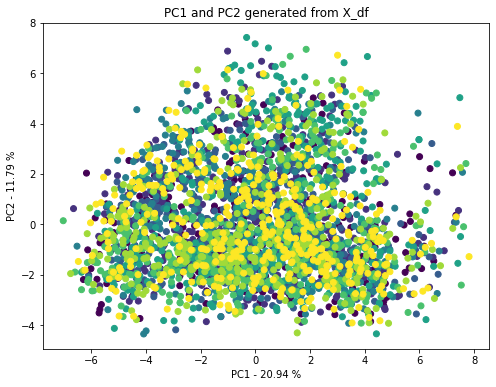

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X_all_df)
pca = PCA(n_components=2)
pca.fit(scaled_X)
projected_X = pca.transform(scaled_X)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)

print('shape of projected_X: ', projected_X.shape)
print('explained variance ratio of principle component 1 (PC1): ', per_var[0],'%')
print('explained variance ratio of principle component 2 (PC2): ', per_var[1],'%')
plt.figure(figsize=(8,6))
plt.scatter(projected_X[:,0], projected_X[:,1], c=y_all_df.to_numpy().ravel())
plt.title('PC1 and PC2 generated from X_df')
plt.xlabel('PC1 - 20.94 %')
plt.ylabel('PC2 - 11.79 %')

From the plot, we can see data points of the two classes overlap.
- We will see if the deep learning model can achieve a high accuracy predicting the eight classes.

We will also visualise the features extracted using one Hakuna sample and one Panther sample.

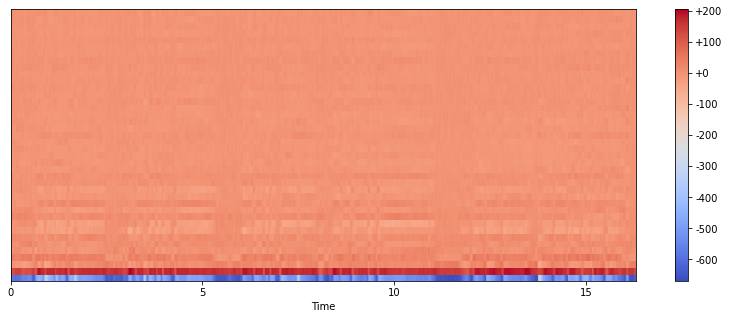

In [ ]:
import librosa.display

audio_file = "/content/drive/MyDrive/Data/MLEndHW/hakuna/S1_hum_2_Hakuna.wav"
ipd.Audio(audio_file)

# load audio files with librosa
signal, sr = librosa.load(audio_file)

mfccs = librosa.feature.mfcc(y=signal, n_mfcc=40, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

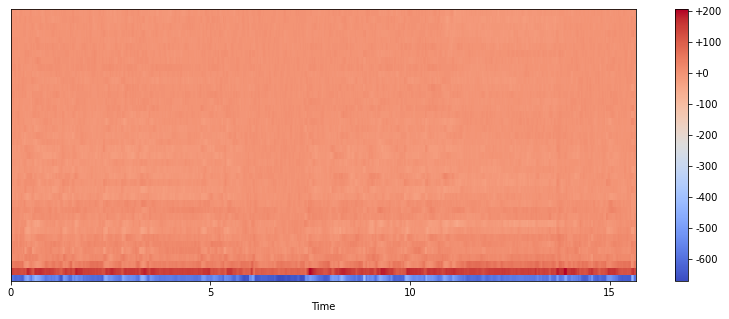

In [ ]:
audio_file = "/content/drive/MyDrive/Data/MLEndHW/panther/S1_hum_2_Panther.wav"
#ipd.Audio(audio_file)

# load audio files with librosa
signal, sr = librosa.load(audio_file)

mfccs = librosa.feature.mfcc(y=signal, n_mfcc=40, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

From the two plots above, it seems there are pattern differences in Hakuna and Panther audio segments.
- We will see if our deep learning model will be able to make predictions based on the features extracted.

## Create training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_all,y_all,test_size=0.2,random_state=0)

Normalise training and validation data.

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)

Normalise all the data we have.

In [ ]:
X_all = tf.keras.utils.normalize(X_all, axis=1)

# 8 Results

Carry out your experiments here, explain your results.

## Model 1
Let's create our first model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 8

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

Let's train the model.

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val,y_val),
          verbose=2)

Epoch 1/50
83/83 - 1s - loss: 2.0848 - accuracy: 0.1275 - val_loss: 2.0822 - val_accuracy: 0.1093 - 1s/epoch - 18ms/step
Epoch 2/50
83/83 - 1s - loss: 2.0794 - accuracy: 0.1249 - val_loss: 2.0786 - val_accuracy: 0.1275 - 505ms/epoch - 6ms/step
Epoch 3/50
83/83 - 0s - loss: 2.0691 - accuracy: 0.1579 - val_loss: 2.0725 - val_accuracy: 0.1351 - 492ms/epoch - 6ms/step
Epoch 4/50
83/83 - 1s - loss: 2.0615 - accuracy: 0.1598 - val_loss: 2.0744 - val_accuracy: 0.1533 - 508ms/epoch - 6ms/step
Epoch 5/50
83/83 - 1s - loss: 2.0354 - accuracy: 0.1822 - val_loss: 2.0434 - val_accuracy: 0.1897 - 518ms/epoch - 6ms/step
Epoch 6/50
83/83 - 1s - loss: 2.0157 - accuracy: 0.2046 - val_loss: 2.0348 - val_accuracy: 0.1942 - 536ms/epoch - 6ms/step
Epoch 7/50
83/83 - 1s - loss: 1.9910 - accuracy: 0.2224 - val_loss: 2.0549 - val_accuracy: 0.1745 - 509ms/epoch - 6ms/step
Epoch 8/50
83/83 - 1s - loss: 1.9773 - accuracy: 0.2243 - val_loss: 2.0130 - val_accuracy: 0.1927 - 504ms/epoch - 6ms/step
Epoch 9/50
83/83 -

Our neural network architecture has a validation accuracy of 0.26.
- We will use other performance matrix to check the model's quality

Put the model's predicted labels into a list.

In [ ]:
 y_pred_list = np.argmax(model.predict(X_val), axis=1)

Convert validation data into a list.

In [ ]:
y_val_list = np.argmax(y_val, axis=1)

Check the precision, sensitivity (recall), and confusion matrix.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

precision, recall, _, _ = precision_recall_fscore_support(y_val_list,
                                                          y_pred_list)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))

confusion_mtx = pd.DataFrame.from_records(confusion_matrix(y_val_list,
                                                           y_pred_list))
print('Confusion matrix:')
display(confusion_mtx)

Precision for each class: [0.21428571 0.25       0.22131148 0.54761905 0.23076923 0.20915033
 0.20253165 0.48214286].
Recall for each class: [0.24       0.08695652 0.32926829 0.2371134  0.27631579 0.44444444
 0.20253165 0.31395349].

Confusion matrix:


,0,1,2,3,4,5,6,7
0,18,5,23,0,5,17,7,0
1,16,8,19,7,16,12,10,4
2,8,6,27,2,7,16,10,6
3,16,6,18,23,8,15,8,3
4,7,3,9,4,21,22,6,4
5,2,1,7,2,11,32,9,8
6,9,0,10,1,15,24,16,4
7,8,3,9,3,8,15,13,27


Our model has both low precision and recall for all classes.
- From the confusion matrix, we can see the model made many mistakes when predicting the labels.

## Model 2
Let's create our second model.
- In our second model, let's try the Stochastic Gradient Descent (SGD) optimisation method.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 8

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='SGD')

Let's train the model.

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val,y_val),
          verbose=2)

Epoch 1/50
83/83 - 1s - loss: 2.0811 - accuracy: 0.1184 - val_loss: 2.0808 - val_accuracy: 0.1153 - 1s/epoch - 13ms/step
Epoch 2/50
83/83 - 0s - loss: 2.0798 - accuracy: 0.1260 - val_loss: 2.0813 - val_accuracy: 0.1229 - 431ms/epoch - 5ms/step
Epoch 3/50
83/83 - 0s - loss: 2.0801 - accuracy: 0.1275 - val_loss: 2.0815 - val_accuracy: 0.1108 - 452ms/epoch - 5ms/step
Epoch 4/50
83/83 - 0s - loss: 2.0811 - accuracy: 0.1199 - val_loss: 2.0820 - val_accuracy: 0.1002 - 450ms/epoch - 5ms/step
Epoch 5/50
83/83 - 0s - loss: 2.0792 - accuracy: 0.1324 - val_loss: 2.0819 - val_accuracy: 0.0835 - 471ms/epoch - 6ms/step
Epoch 6/50
83/83 - 0s - loss: 2.0798 - accuracy: 0.1241 - val_loss: 2.0820 - val_accuracy: 0.0880 - 467ms/epoch - 6ms/step
Epoch 7/50
83/83 - 0s - loss: 2.0799 - accuracy: 0.1180 - val_loss: 2.0817 - val_accuracy: 0.0865 - 446ms/epoch - 5ms/step
Epoch 8/50
83/83 - 0s - loss: 2.0796 - accuracy: 0.1184 - val_loss: 2.0820 - val_accuracy: 0.1244 - 465ms/epoch - 6ms/step
Epoch 9/50
83/83 -

Our neural network architecture has a validation accuracy of 0.12.
- We will use other performance matrix to check the model's quality

Put the model's predicted labels into a list.

In [ ]:
 y_pred_list = np.argmax(model.predict(X_val), axis=1)

Convert validation data into a list.

In [ ]:
y_val_list = np.argmax(y_val, axis=1)

Check the precision, sensitivity (recall), and confusion matrix.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

precision, recall, _, _ = precision_recall_fscore_support(y_val_list,
                                                          y_pred_list)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))

confusion_mtx = pd.DataFrame.from_records(confusion_matrix(y_val_list,
                                                           y_pred_list))
print('Confusion matrix:')
display(confusion_mtx)

Precision for each class: [0.16666667 0.14285714 0.         0.         0.         0.11069418
 0.18333333 0.17647059].
Recall for each class: [0.09333333 0.01086957 0.         0.         0.         0.81944444
 0.13924051 0.03488372].

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7
0,7,1,0,0,0,64,3,0
1,8,1,0,0,0,73,6,4
2,3,0,0,0,0,72,5,2
3,10,1,0,0,0,75,7,4
4,4,0,0,0,0,63,8,1
5,2,0,0,0,0,59,9,2
6,4,2,0,0,0,61,11,1
7,4,2,0,0,0,66,11,3


Our model has both low precision and recall for all classes.
- From the confusion matrix, we can see the model made many mistakes when predicting the labels.

## Model 3
Let's create our third model.
- In our third model, let's try the Hyperbolic Tangent (Tanh) activation function.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 8

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

Let's train the model.

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val,y_val),
          verbose=2)

Epoch 1/50
83/83 - 1s - loss: 2.1016 - accuracy: 0.1245 - val_loss: 2.1067 - val_accuracy: 0.1077 - 1s/epoch - 17ms/step
Epoch 2/50
83/83 - 1s - loss: 2.0736 - accuracy: 0.1605 - val_loss: 2.0568 - val_accuracy: 0.1593 - 620ms/epoch - 7ms/step
Epoch 3/50
83/83 - 1s - loss: 2.0405 - accuracy: 0.1901 - val_loss: 2.0421 - val_accuracy: 0.1760 - 620ms/epoch - 7ms/step
Epoch 4/50
83/83 - 1s - loss: 2.0236 - accuracy: 0.2023 - val_loss: 2.0218 - val_accuracy: 0.2140 - 628ms/epoch - 8ms/step
Epoch 5/50
83/83 - 1s - loss: 1.9907 - accuracy: 0.2250 - val_loss: 2.0108 - val_accuracy: 0.2307 - 582ms/epoch - 7ms/step
Epoch 6/50
83/83 - 1s - loss: 1.9915 - accuracy: 0.2292 - val_loss: 2.0219 - val_accuracy: 0.1912 - 645ms/epoch - 8ms/step
Epoch 7/50
83/83 - 1s - loss: 1.9836 - accuracy: 0.2406 - val_loss: 2.0087 - val_accuracy: 0.2155 - 586ms/epoch - 7ms/step
Epoch 8/50
83/83 - 1s - loss: 1.9827 - accuracy: 0.2410 - val_loss: 2.0164 - val_accuracy: 0.2200 - 607ms/epoch - 7ms/step
Epoch 9/50
83/83 -

Our neural network architecture has a validation accuracy of 0.25.
- We will use other performance matrix to check the model's quality

Put the model's predicted labels into a list.

In [ ]:
 y_pred_list = np.argmax(model.predict(X_val), axis=1)

Convert validation data into a list.

In [ ]:
y_val_list = np.argmax(y_val, axis=1)

Check the precision, sensitivity (recall), and confusion matrix.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

precision, recall, _, _ = precision_recall_fscore_support(y_val_list,
                                                          y_pred_list)
print('Precision for each class: {0}.'.format(precision))
print('Recall for each class: {0}.\n'.format(recall))

confusion_mtx = pd.DataFrame.from_records(confusion_matrix(y_val_list,
                                                           y_pred_list))
print('Confusion matrix:')
display(confusion_mtx)

Precision for each class: [0.23728814 0.16666667 0.32       0.31967213 0.22330097 0.1875
 0.18604651 0.33802817].
Recall for each class: [0.37333333 0.0326087  0.19512195 0.40206186 0.30263158 0.125
 0.30379747 0.27906977].

Confusion matrix:


,0,1,2,3,4,5,6,7
0,28,2,7,9,9,6,11,3
1,17,3,7,17,15,7,15,11
2,16,2,16,9,13,3,15,8
3,14,1,6,39,14,4,13,6
4,14,1,2,15,23,3,10,8
5,4,4,5,6,11,9,26,7
6,13,4,3,12,9,10,24,4
7,12,1,4,15,9,6,15,24


Our model has both low precision and recall for all classes.
- From the confusion matrix, we can see the model made many mistakes when predicting the labels.

## Final choice

Based on the validation accuracy and other performance matrics, we will choose model 3.
- We will use all training and validation data to train it.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

num_classes = 8

# model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
83/83 - 0s - loss: 1.9150 - accuracy: 0.2835 - 470ms/epoch - 6ms/step
Epoch 2/50
83/83 - 0s - loss: 1.9183 - accuracy: 0.2880 - 441ms/epoch - 5ms/step
Epoch 3/50
83/83 - 0s - loss: 1.9166 - accuracy: 0.2805 - 438ms/epoch - 5ms/step
Epoch 4/50
83/83 - 0s - loss: 1.9136 - accuracy: 0.2812 - 454ms/epoch - 5ms/step
Epoch 5/50
83/83 - 0s - loss: 1.9090 - accuracy: 0.2843 - 435ms/epoch - 5ms/step
Epoch 6/50
83/83 - 0s - loss: 1.9131 - accuracy: 0.2994 - 429ms/epoch - 5ms/step
Epoch 7/50
83/83 - 0s - loss: 1.9126 - accuracy: 0.2820 - 439ms/epoch - 5ms/step
Epoch 8/50
83/83 - 0s - loss: 1.9188 - accuracy: 0.2892 - 436ms/epoch - 5ms/step
Epoch 9/50
83/83 - 0s - loss: 1.9133 - accuracy: 0.2911 - 454ms/epoch - 5ms/step
Epoch 10/50
83/83 - 0s - loss: 1.9072 - accuracy: 0.2869 - 432ms/epoch - 5ms/step
Epoch 11/50
83/83 - 0s - loss: 1.9026 - accuracy: 0.2941 - 447ms/epoch - 5ms/step
Epoch 12/50
83/83 - 0s - loss: 1.9055 - accuracy: 0.2843 - 438ms/epoch - 5ms/step
Epoch 13/50
83/83 - 0s - 

Save the model.

In [ ]:
model.save('/content/drive/MyDrive/Data/MLEndHW/model_all_1/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data/MLEndHW/model_all_1/assets


# 9 Conclusions

Your conclusions, improvements, etc should go here

Our machine learning pipline can predict the labels of all songs in the MLEnd Hums and Whistles dataset, given the features data extracted from the all audio segments in the dataset.
- The model in the pipline has low accuracy, precision and recall.

Improvements:
- We could have explored different:
    - neural network architectures
    - activation functions in output layers
    - loss functions
    - feature extraction method
- We could have used k-fold cross-validation to validate our model.
- Other factors should be considered when selecting the model.
    - We should not select the model only based on the quality matrices.
- We could have used better visualisation techniques.
    - PCA is not useful for visualisation.